<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/FraccionesParcialesLaplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución de SLIT con Laplace en Sympy

Aplicación de fracciones parciales

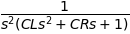

In [1]:
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s**2 # x(t)=t -> Función rampa

Y = 1/(L*C*s**2 + R*C*s + 1) * X
#Función de salida
Y

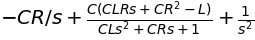

In [2]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s)
Yp

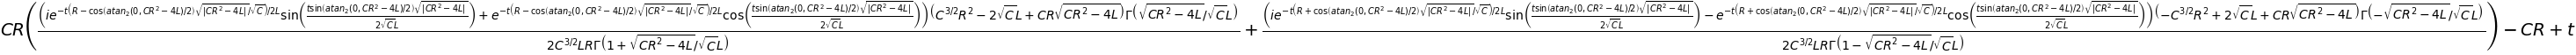

In [3]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt

In [4]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
 
yt

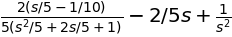

In [5]:
#Función de salida Y(s) -- Laplace
Ye

In [6]:
#Función de salida y(t) -- en tiempo
yt

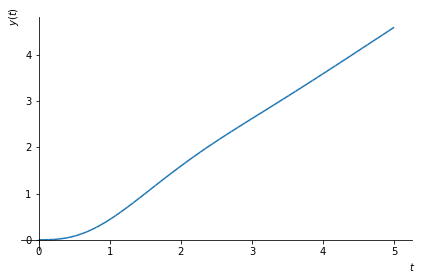

In [7]:
#Gráfica de salida en el tiempo
sym.plot(yt, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$')